In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Proyecto integrado

## Nivel de éxito de videojuegos en distintas plataformas en el año 2016

### 1. Preparación de los datos 


Primero leemos y analizamos los tipos de datos que tenemos, los nombres de las calumnas y valores que contienen.

In [2]:
games = pd.read_csv("games.csv") #leemos el archivo

In [3]:
games.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Nos encontramos con 3 columnas cuyos valores ausentes son significativos, ya que son una gran proporsión de los valores totales. Se requiere analizar a qué están ligados antes de saber cómo tratarlos, dado que son datos categóricos su tratamiento se realizará más adelante para continuar con el análisis de ventas.

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

Hacemos las modificaciones necesarias a los datos. Agregamos una columna con formato fecha para el año de lanzamiento sin eliminar la columan existente ya que podremos utilizar el tipo de datos flotantes más adelante. Modificaremos los nombres de las columnas a minúsculas para cumplir con la estructura. Crearemos una columna con el user score como flotante sin eliminar la anterior como respaldo, para lo que será necesario respetar los datos que están por procesar (tbd) ya que no conviene elimianrlos.

In [6]:
games["Year_Date"] = pd.to_datetime(games["Year_of_Release"], format="%Y") #creamos una columna con el formato fecha para el año de lanzamiento.

In [7]:
games.columns = games.columns.str.lower() #cambiamos los nombres a minúsculas

En el caso de datos tbd haremos un filtrado, los que cumplen la condición de ser tbd se asignaran como valores negativos para no eliminarlos ni tomarlos como nulos, sin embargo, a la hora de hacer cálculos hay que considerar que los valores pueden verse afectados pro esto. Se tomará en cuenta el rango real de los números para no afectarse por los nuevos negativos. Los valores reales o "completos" se asignarán a una nueva columna llamada user_score_new.

In [8]:
#Nueva columna de user score como flotante
games["user_score_new"] = np.where(
    #se asigna negativo a los datos que estén por procesarlo identificando que es por determinarse, 
    # sin embargo al momento de calcular un promedio se descartarían los valores negativos que pudieran afectar.
    games["user_score"] == "tbd",
    -1,
    games["user_score"]
)
games["user_score_new"] = games["user_score_new"].astype("float")


In [9]:
#Suma de las ventas totales
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

### 2. Análisis de datos

*¿Los datos son significativos en cada periodo? Graficaremos los lanzamientos agrupándolos por año para distinguir los periodos más relevantes

<Axes: xlabel='year_date'>

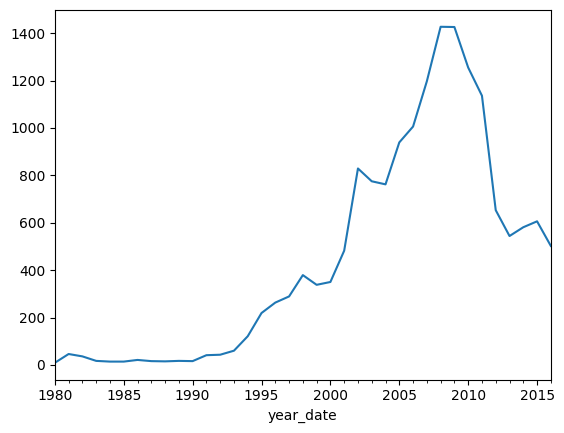

In [10]:
games.groupby("year_date")["name"].count().plot(kind="line") #agrupamos y graficamos

Dado que antes del 1993 los lanzamientos no son muchos y no parecen afectar la tendencia posterios ni las decisiones que puedan tomarse para el 2017, podemos filtrarlos de nuestro análisis. Hay una tendencia positiva hasta 2008, y posteriormente hay un declive en lacantidad de lanzamientos.

*Plataformas más populares. ¿Cuales eran las plataformas más populares y ahora no? ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

<Axes: xlabel='year_date'>

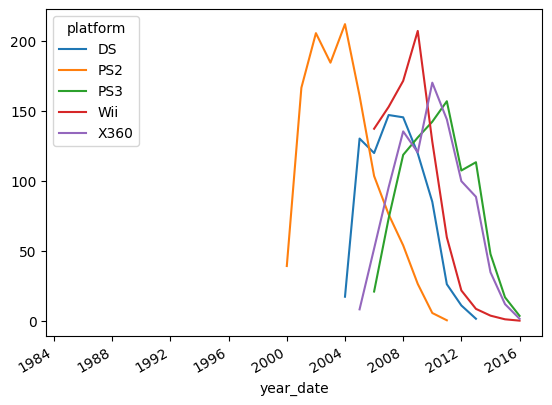

In [22]:
#plataformas por ventas totales
top_platforms = list(games.groupby("platform")["total_sales"].sum().sort_values().tail(5).index)
#graficaremos el top 5 de las plataformas con mayor ventas

(
    games[games["platform"].isin(top_platforms)]
    .pivot_table(index="year_date",
                 columns="platform",
                 values="total_sales",
                 aggfunc="sum")
    .plot(kind="line")
)

Graficamos la distribución por año de las plataformas más populares desde 1993

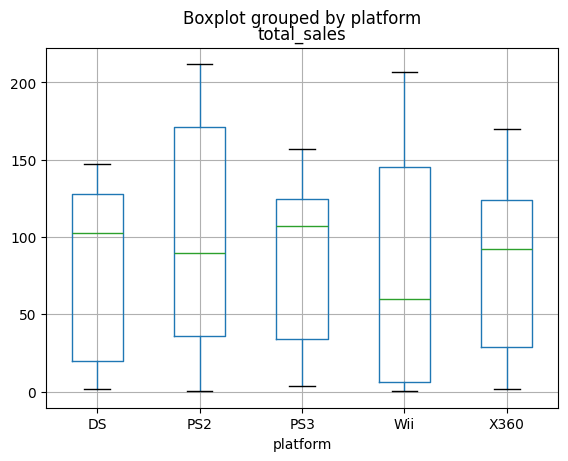

In [26]:
filtered_games = games.query("year_date > '1993-01-01'")

sales_by_year = filtered_games.groupby(["year_date", "platform"])["total_sales"].sum().reset_index()

sales_by_year[sales_by_year["platform"].isin(top_platforms)][["total_sales", "platform"]].boxplot(
    column="total_sales",
    by="platform",
)
plt.show()

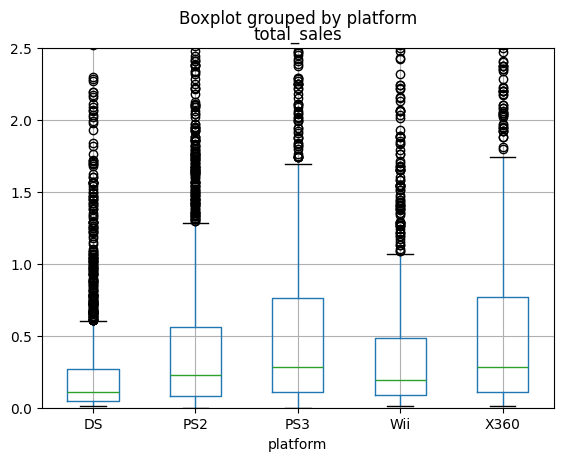

In [27]:
#Distribución de ventas totales por plataforma
filtered_games[filtered_games["platform"].isin(top_platforms)].boxplot(
    column="total_sales",
    by="platform",
)
plt.ylim(0, 2.5)
plt.show()

Dado que nos interesa el análisis para predicciones del año 2017, lo más representativo sería obtener el top 5 de las plataformas con mayores ventas en los ultimos 6 años y no desde el inicio de los lanzamientos.

In [ ]:
#Filtramos los la tabla con datos del 2010 al 2016
games_2010 = games[games["year_of_release"] >= 2010]
print(games_2010.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 5277 entries, 14 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             5277 non-null   object        
 1   platform         5277 non-null   object        
 2   year_of_release  5277 non-null   float64       
 3   genre            5277 non-null   object        
 4   na_sales         5277 non-null   float64       
 5   eu_sales         5277 non-null   float64       
 6   jp_sales         5277 non-null   float64       
 7   other_sales      5277 non-null   float64       
 8   critic_score     2312 non-null   float64       
 9   user_score       3179 non-null   object        
 10  rating           3113 non-null   object        
 11  year_date        5277 non-null   datetime64[ns]
 12  user_score_new   3179 non-null   float64       
 13  total_sales      5277 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(5)

<Axes: xlabel='year_date'>

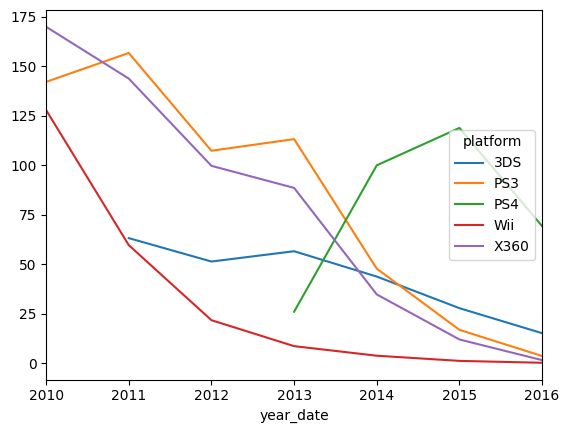

In [ ]:
top_platforms_2010 = list(games_2010.groupby("platform")["total_sales"].sum().sort_values().tail(5).index)
#graficaremos el top 5 de las plataformas con mayor ventas

(
    games_2010[games_2010["platform"].isin(top_platforms_2010)]
    .pivot_table(index="year_date",
                 columns="platform",
                 values="total_sales",
                 aggfunc="sum")
    .plot(kind="line")
)

Para descubrir el comportamiento de la popularidad en cuanto al tiempo, sería interesante dividir el análisis por consola. Ya que cada consola suele lanzar su actualización impactando las ventas de su versión anterior. Clasificaremos las plataformas de la siguiente manera:
- XBox: XB, X360, XOne
- Play Station: PS, PS2, PS3, PS4, 
- Play portátil: PSP, PSV
- Nintendo: NES, SNES, N64, GC, Wii, WiiU
- Nintendo portátil: GB, GC, GBA, DS, 3DS

<Axes: xlabel='year_date'>

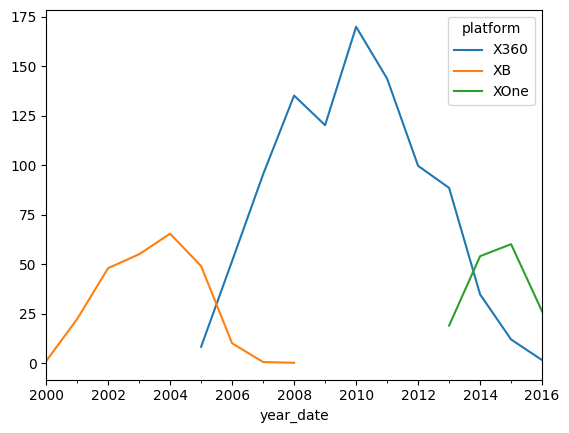

In [29]:
xbox = ["XB", "X360", "XOne"]

games[games["platform"].isin(xbox)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")


<Axes: xlabel='year_date'>

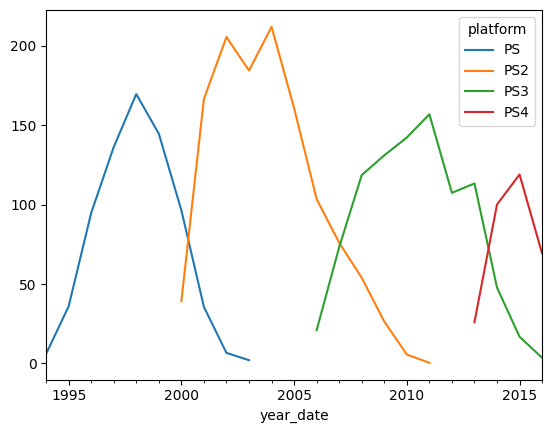

In [33]:
play_s = ["PS", "PS2", "PS3", "PS4"]

games[games["platform"].isin(play_s)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

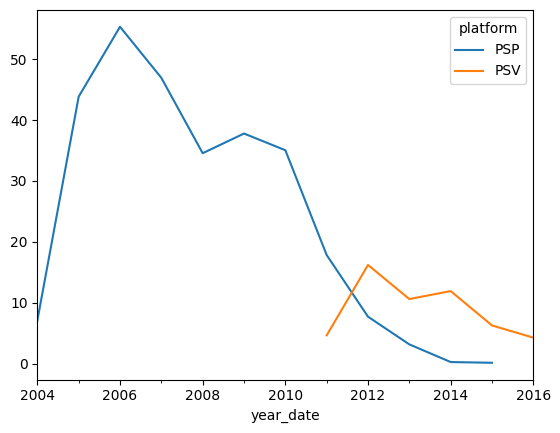

In [34]:
play_p = ["PSP", "PSV"]

games[games["platform"].isin(play_p)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

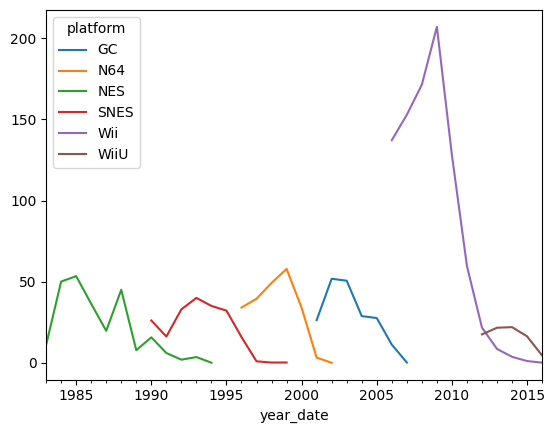

In [28]:
nintendo = ["NES", "SNES", "N64", "GC", "Wii", "WiiU"]

games[games["platform"].isin(nintendo)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

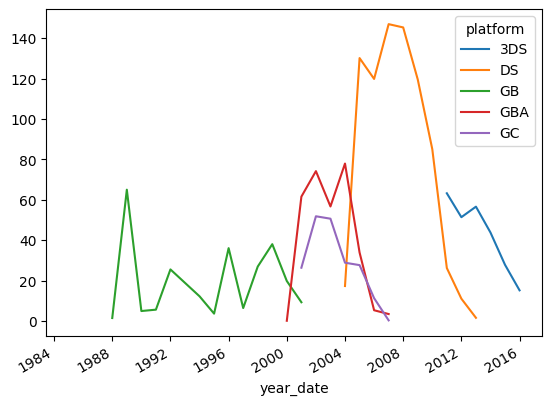

In [36]:
nintendo_p = ["GB", "GC", "GBA", "DS", "3DS"]
              
games[games["platform"].isin(nintendo_p)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")